<a href="https://colab.research.google.com/github/Frans-Grau/P5-Forecasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
### Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as plt
import itertools
import pmdarima 
from statsmodels.tsa.arima.model import ARIMA

In [13]:
### Load the Datasets
df2016 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2016.csv')
df2017 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2017.csv')
df2018 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2018.csv')

### Quick preprocessing
df_all = pd.concat([df2016,df2017,df2018], ignore_index = True, axis = 0)
df_all.drop(['Unnamed: 0','CANCELLED','DIVERTED'], axis=1, inplace= True)
df_all.dropna(inplace=True)
df_all['FL_DATE'] = pd.to_datetime(df_all['FL_DATE'])

### New column OP-Carrier code to full Airline Name
df_all['AIRLINE'] = df_all['OP_CARRIER'].apply(lambda x: 'Delta Airlines' if x == 'DL' else 'Southwest Airlines' if x=='WN' else 'American Airlines' if x=='AA' 
else 'JetBlue Airways' if x=='B6' else 'SkyWest Airlines' if x=='OO' else 'Atlantic Southeast Airlines' if x == 'EV' else 'United Airlines' if x == 'UA' 
else 'Pinnacle Airlines' if x == '9E' else 'Spirit Airlines' if x== 'NK' else 'Alaska Airlines' if x == 'AS' else 'Virgin America' if x == 'VX' else 'Frontier' if x =='F9' 
else 'Republic Airlines' if x == 'YX'else 'Hawaiian Airlines' if x == 'HA' else 'Envoy Air' if x == 'MQ' else 'Air Shuttle' if x == 'YV' else 'Allegiant Air' if x=='G4' 
else 'Comair')

df_all.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,AIR_TIME,DISTANCE,AIRLINE
0,2016-01-01,DL,ATL,GRR,2125,2130.0,5.0,2321,2319.0,92.0,640.0,Delta Airlines
1,2016-01-01,DL,LAX,ATL,2255,2256.0,1.0,600,547.0,207.0,1947.0,Delta Airlines
2,2016-01-01,DL,ATL,BNA,1233,1356.0,83.0,1239,1402.0,38.0,214.0,Delta Airlines
3,2016-01-01,DL,ATL,JAX,945,946.0,1.0,1050,1053.0,45.0,270.0,Delta Airlines
4,2016-01-01,DL,ATL,OKC,2110,2107.0,-3.0,2236,2224.0,116.0,761.0,Delta Airlines


In [14]:
### Group the delay minutes by date
df_delay = df_all.groupby('FL_DATE')['DEP_DELAY'].mean().reset_index()
df_delay = df_delay.sort_values('FL_DATE')
df_delay['Month'] = pd.DatetimeIndex(df_delay['FL_DATE']).month
df_delay = df_delay.sort_values('FL_DATE').set_index('FL_DATE')
df_delay

,DEP_DELAY,Month
FL_DATE,,
2016-01-01,6.106262,1
2016-01-02,9.728279,1
2016-01-03,15.104025,1
2016-01-04,10.579281,1
2016-01-05,12.293303,1
...,...,...
2018-12-27,20.029929,12
2018-12-28,32.150881,12
2018-12-29,15.529323,12


In [30]:
### ARIMA 
# Create the train set
train_set = df_delay[(df_delay.index >= '2016/01/01') & (df_delay.index <= '2017/12/31')]
print('The minimum date we have is', train_set.index.min(), 'and the maximum date is ',  train_set.index.max())

# Create the test set
test_set = df_delay[~df_delay.index.isin(train_set.index)]
print('The minimum date we have is', test_set.index.min(), 'and the maximum date is ',  test_set.index.max())

# #fit model
arima_model = ARIMA(train_set['DEP_DELAY'], order=(2,0,1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

# #forecast
arima_model_fit.forecast()

The minimum date we have is 2016-01-01 00:00:00 and the maximum date is  2017-12-31 00:00:00
The minimum date we have is 2018-01-01 00:00:00 and the maximum date is  2018-12-31 00:00:00


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

                               SARIMAX Results                                
Dep. Variable:              DEP_DELAY   No. Observations:                  731
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2604.126
Date:                Wed, 04 Jan 2023   AIC                           5218.253
Time:                        16:57:04   BIC                           5241.225
Sample:                    01-01-2016   HQIC                          5227.115
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7743      2.080      5.181      0.000       6.698      14.850
ar.L1          1.4191      0.052     27.481      0.000       1.318       1.520
ar.L2         -0.4364      0.041    -10.520      0.0

2018-01-01    10.263029
Freq: D, dtype: float64

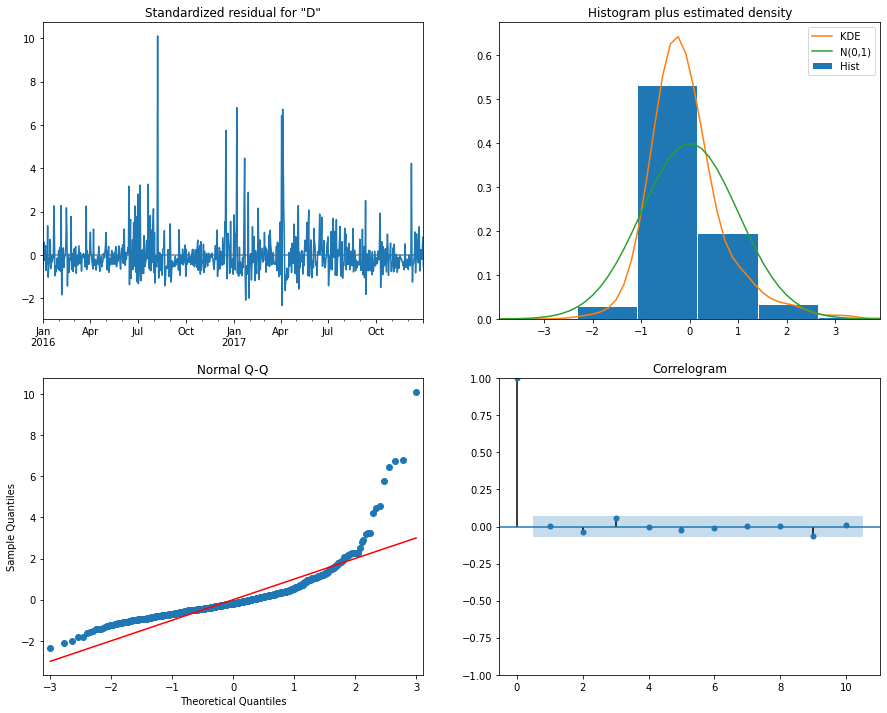

In [31]:
arima_model_fit.plot_diagnostics(figsize=(15,12))
plt.show()